In [1]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the dataset
print(dataset.describe())

                0             1           2           3           4  \
count  768.000000    768.000000  768.000000  768.000000  768.000000   
mean     3.940104    380.910156   69.105469   20.536458   79.799479   
std      4.324703   5093.663558   19.355807   15.952218  115.244002   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      1.000000     99.000000   62.000000    0.000000    0.000000   
50%      3.000000    117.000000   72.000000   23.000000   30.500000   
75%      6.000000    141.000000   80.000000   32.000000  127.250000   
max     79.000000  99999.000000  122.000000   99.000000  846.000000   

                5           6           7           8  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.831771    0.535888   33.319010    0.348958  
std     18.190821    1.817614   11.995482    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.050000    0.3

In [2]:
# Q 4 Find the indices of the rows that have missing values as 99999

for i in range(len(dataset.columns)):
    for j in range(len(dataset.index)):
        if dataset.loc[j].values[i] ==99999:
            print(i,j)


1 500
1 549


In [3]:
# Q 5 Find how many missing values are present in each column
# example of summarizing the number of missing values for each variable
# count the number of missing values for each column
num_Zero = (dataset[[1,2,3,4,5]] == 0).sum()
num_Nine = (dataset[[1,2,3,4,5]] == 99999).sum()
num_missing = num_Zero + num_Nine 
# report the results
print(num_missing)

1      7
2     35
3    227
4    374
5     11
dtype: int64


In [4]:
import numpy
dataset.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
arr = dataset.to_numpy()
elements = numpy.array(arr)
mean = numpy.nanmean(elements, axis=0)
sd = numpy.nanstd(elements, axis=0)
final_list = []

for i in range(len(arr)):
    for j in range(len(arr[i])):    
        if arr[i][j] > (mean[j] + 3 * sd[j]) or arr[i][j] < (mean[j] - 3 * sd[j]):
            arr[i][j] = True
            print(i,j, dataset.columns[j])

7 2 pres
8 4 test
13 4 test
15 2 pres
49 2 pres
60 2 pres
78 2 pres
81 2 pres
111 4 test
153 4 test
159 0 preg
172 2 pres
186 4 test
193 2 pres
220 4 test
222 2 pres
228 4 test
247 4 test
261 2 pres
266 2 pres
269 2 pres
286 4 test
300 2 pres
332 2 pres
336 2 pres
347 2 pres
357 2 pres
370 4 test
409 4 test
415 4 test
426 2 pres
430 2 pres
435 2 pres
453 2 pres
453 7 age
459 7 age
468 2 pres
484 2 pres
486 4 test
494 2 pres
499 0 preg
499 5 mass
499 6 pedi
499 7 age
500 1 plas
500 5 mass
522 2 pres
533 2 pres
535 2 pres
549 1 plas
579 3 skin
584 4 test
589 2 pres
601 2 pres
604 2 pres
619 2 pres
643 2 pres
645 4 test
655 4 test
666 7 age
695 4 test
697 2 pres
703 2 pres
706 2 pres
753 4 test


In [5]:
# Q7 
# Box and Whisker Plots
from matplotlib import pyplot
from pandas import read_csv
pyplot.rcParams["figure.figsize"] = 9,9
filename = "pima-indians-diabetes_Gokaraju_edited.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) 
pyplot.show()

<Figure size 900x900 with 9 Axes>

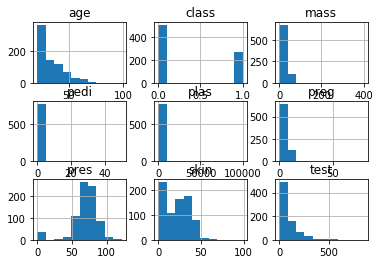

In [6]:
# Univariate Histograms
from matplotlib import pyplot
data.hist()
pyplot.rcParams["figure.figsize"] = 9,9
pyplot.show()

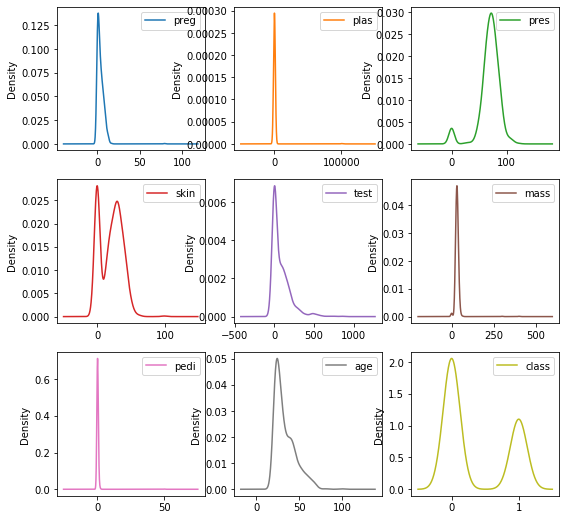

In [7]:
# Univariate Density Plots
from matplotlib import pyplot
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False) 
pyplot.rcParams["figure.figsize"] = 9,9
pyplot.show()

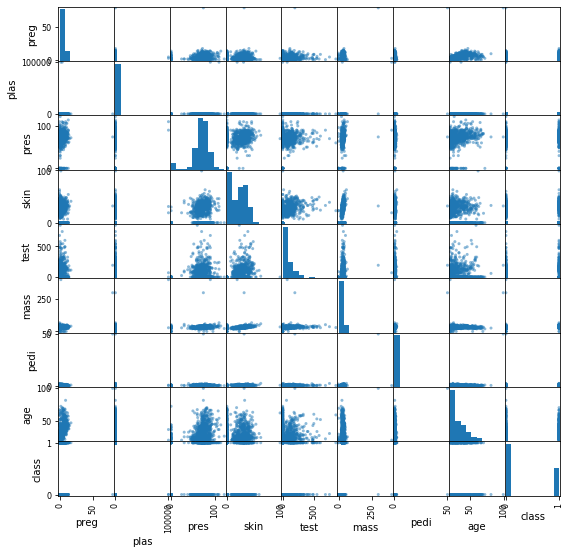

In [8]:
# Scatterplot Matrix
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

data = read_csv(filename, names=names)
scatter_matrix(data)
pyplot.rcParams["figure.figsize"] = 9,9
pyplot.show()


In [9]:
# Q8 Replace missing Values and errors with NaNs and print the descriptive statistics of the dataset
# example of review rows from the dataset with missing values marked
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes_Gokaraju_edited.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# replace '99999' values with 'nan'
dataset[[1]] = dataset[[1]].replace(99999, nan)
# print the first 20 rows of data
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  761.000000  733.000000  541.000000  394.000000  757.000000   
mean     3.940104  121.604468   72.405184   29.153420  155.548223   33.308851   
std      4.324703   30.477557   12.382158   10.476982  118.775855   17.883197   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   64.000000   22.000000   76.250000   27.500000   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   32.400000   
75%      6.000000  141.000000   80.000000   36.000000  190.000000   36.700000   
max     79.000000  199.000000  122.000000   99.000000  846.000000  400.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.535888   33.319010    0.348958  
std      1.817614   11.995482    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

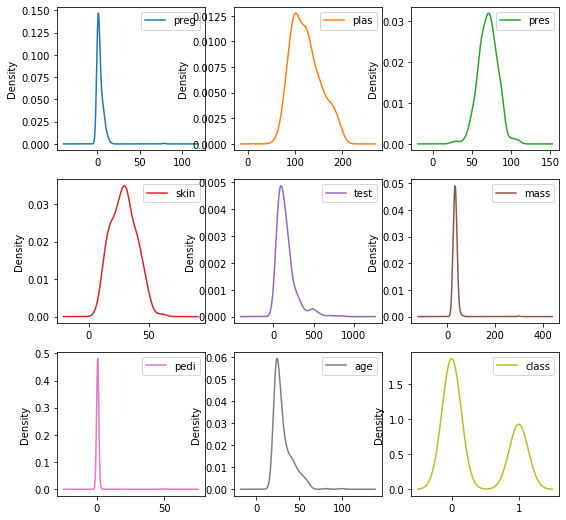

In [10]:
# Q9 Remove the rows of the Missing Data
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes_Gokaraju_edited.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# replace '99999' values with 'nan'
dataset[[1]] = dataset[[1]].replace(99999, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
dataset.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = dataset
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False) 
pyplot.rcParams["figure.figsize"] = 9,9
pyplot.show()

In [11]:
# Q6  Find the Column_Names that could have outliers. 
import numpy
dataset.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
arr = dataset.to_numpy()
elements = numpy.array(arr)

mean = numpy.nanmean(elements, axis=0)
sd = numpy.nanstd(elements, axis=0)
final_list = []

for i in range(len(arr)):
    for j in range(len(arr[i])):    
        if arr[i][j] > (mean[j] + 3 * sd[j]) or arr[i][j] < (mean[j] - 3 * sd[j]):
            arr[i][j] = True
            print(i,j, dataset.columns[j])

3 4 test
4 4 test
7 2 pres
19 2 pres
57 2 pres
86 2 pres
110 4 test
119 4 test
135 4 test
206 4 test
225 3 skin
235 7 age
255 0 preg
255 5 mass
255 6 pedi
255 7 age
300 4 test
306 2 pres
336 4 test


In [12]:
# Q10
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = 'pima-indians-diabetes_Gokaraju_edited.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[8.950e+01 6.207e+04 1.761e+01 5.311e+01 2.176e+03 6.695e+01 1.640e-01
 1.736e+02]
[[  6.  148.   35.    0.   33.6  50. ]
 [  1.   85.   29.    0.   26.6  31. ]
 [  8.  183.    0.    0.   23.3  32. ]
 [  1.   89.   23.   94.   28.1  21. ]
 [  0.  137.   35.  168.   43.1  33. ]]


In [13]:
# Q11 - Raw data
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
filename = 'pima-indians-diabetes_Gokaraju_edited.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.

0.6510252904989747


In [14]:
# Q11 - missing values are removed 
# SVM Classification
from numpy import nan
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
dataset = read_csv('pima-indians-diabetes_Gokaraju_edited.csv', header=None)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# replace '99999' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(99999, nan)
df = dataset.dropna()
#dataframe = read_csv(filename, names=names)
array = df.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6676923076923077


/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.

In [15]:
# Q12 - 
# SVM Classification
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from numpy import nan
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
# load data
filename = 'pima-indians-diabetes_Gokaraju_edited.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)


attr_removed_dataframe = dataframe.copy()
del attr_removed_dataframe['pedi']
del attr_removed_dataframe['plas']

array_attr = attr_removed_dataframe.values
X_attr = array_attr[:,0:6]
Y_attr = array_attr[:,6]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X_attr, Y_attr, cv=kfold)
print(results.mean())

/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.

0.6484107997265892


/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
# Q13
# example of review rows from the dataset with missing values marked
import numpy as np
from numpy import nan
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
dataset = read_csv('pima-indians-diabetes_Gokaraju_edited.csv', header=None)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# replace '99999' values with 'nan'
dataset[[1]] = dataset[[1]].replace(99999, nan)

df = dataset.to_numpy()
col_mean = np.nanmean(df, axis = 0) 
#print(col_mean)
inds = np.where(np.isnan(df)) 
# replace inds with avg of column 
df[inds] = np.take(col_mean, inds[1]) 
X = df[:,0:8]
Y = df[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.

0.6497265892002735


/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
# Q-14
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes_Gokaraju_edited.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

scaler = Normalizer().fit(X[:,0:7] + X[:,7:]) 
normalizedX = scaler.transform(X[:,0:7] + X[:,7:]) # summarize transformed data 
set_printoptions(precision=3) 
print(normalizedX[0:5,:])

[[0.202 0.716 0.441 0.307 0.181 0.302 0.183]
 [0.177 0.641 0.536 0.332 0.171 0.318 0.173]
 [0.159 0.855 0.382 0.127 0.127 0.22  0.13 ]
 [0.113 0.563 0.445 0.225 0.589 0.251 0.108]
 [0.112 0.575 0.247 0.23  0.68  0.257 0.119]]


In [18]:
# Q14
# example of review rows from the dataset with missing values marked
import numpy as np
from numpy import nan
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions

dataset = read_csv('pima-indians-diabetes_Gokaraju_edited.csv', header=None)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# replace '99999' values with 'nan'
dataset[[1]] = dataset[[1]].replace(99999, nan)

df = dataset.to_numpy()
col_mean = np.nanmean(df, axis = 0) 
#print(col_mean)
inds = np.where(np.isnan(df)) 
# replace inds with avg of column 
df[inds] = np.take(col_mean, inds[1]) 
X = df[:,0:8]
Y = df[:,8]
scaler = Normalizer().fit(X[:,0:7] + X[:,7:]) 
normalizedX = scaler.transform(X[:,0:7] + X[:,7:]) # summarize transformed data 
set_printoptions(precision=3) 

kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, np.c_[normalizedX,X[:,6:7]], np.r_[Y[:6],Y[7:],Y[6:7]], cv=kfold)
print(results.mean())

/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.

0.6510082023239917


/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.

In [19]:
# Q-15
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler 
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes_Gokaraju_edited.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X[:,1:3])
rescaledX = scaler.transform(X[:,1:3]) # summarize transformed data 
set_printoptions(precision=3) 

kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model,  np.c_[rescaledX, X[:,0:1], X[:,3:]], np.r_[Y[1:3],Y[0:1],Y[3:]], cv=kfold)
print(results.mean())

/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/susman/opt/anaconda3/lib/python3.

0.6471291866028708
